<div class="alert">  
    <center><h1><strong>
        Machine Learning and Neural Networks finals: Training a model using Neural Networks on top of the reuters dataset
    </strong></h1></center>

## Summary
1. Problem definition and dataset loading
2. Preprocessing the dataset
3. Building the baseline model
4. Training and testing
5. Analyzing the results
6. Model tuning

<div class="alert alert-block alert-info">  
    <center><h2><strong>Problem definition and dataset loading</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<p>Here we are going to Neural Networks in order to train a Machine Learning model that can correctly categorize news articles into different clusters. To train this Machine Learning model we are going to be using tensorflow and the Reuters dataset, which provides a collection of 11,228 newswire articles from Reuters, labeled into 46 different topics.</p>
<p>Below we will separate the work according to the [universal workflow of machine learning](https://bookdown.org/paul/2021_computational_social_science/the-universal-workflow-of-machine-learning.html). We will evalute our model measuring its performance using through its accuracy and loss function throught 20 iterations on top of our dataset.</p>
<p>We will plot a function to visualize these metrics better. We will also count and evaluate the number of positives and false guesses. In the end we will try to tune the hyperparameters of ur baseline mdel in order to build a more performatic model and then compare it against its baseline.</p>

<hr>
<b>Source of the dataset</b> 
 <a href="https://keras.io/api/datasets/reuters/">Reuters - tensorflow</a>
</div>

#### We will start by loading the reuters dataset and separating our dataset into training and testing sets with its respective labels:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization

# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Preprocessing the dataset</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<b>Summary of the section: </b> 
<ul>
    <li>1. Vectorize the dataset using one-hot encoding.</li>
    <li>2. Vectorize the labels using to_categorical.</li>
</ul>   
</div>

#### Now we will apply one-hot encoding to make our data compatible with our Deep Learning models. One-hot encoding transforms categorical data into numerical data by representing each category in the data as a binary vector. To vectorize the data we handcrafted a function below using  numpy.

In [2]:
# Helper function for vectorizing the data input
from tensorflow.keras.utils import to_categorical

# One-hot encode the sequences (vectorizing the input data)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Set specific indices to 1s
    return results

#### To do the same with the labels we are using the to_categorical version from tensorflow.keras.utils which performs good against multi-class classification problems.

In [3]:
# One-hot encode the labels

vectorized_train_data = vectorize_sequences(train_data)
vectorized_test_data = vectorize_sequences(test_data)

# One-hot encode the output labels (categorical labels)
vectorized_train_labels = to_categorical(train_labels)
vectorized_test_labels = to_categorical(test_labels)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Building the baseline model</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<b>Summary of the section: </b> 
<hr>
<p>Here we will be using tensorflow in order to build our model. We will be using teras sequential model which stacks each layer of the network in a linear fashion, meaning the output of one layer is the input of the next. We will be using this model because it is simple enough and it is easy to build as a baseline</p>
<p>We will be creating the network composef of 3 dense (fully-connected) layers. </p>
<p>The first two layers are going to have both 64 neurons and use Rectified Linear Unit (ReLU) as its activation function for its effectiveness in preventing the problem of vanishing gradients. The third one will have 46 neurons and will be used for the labels and will This use thee softmax as an activation function.</p>
<p>As per the optimizer of the model we will use Adaptive Moment Estimation (Adam), which implements an advanced version of Stochastic Gradient Descent (SGD) in order to make the training more efficient. We will also use categorical crossentropy as the activation function here in order to calculate the difference between the true class probability and the predicted probability in the dataset.</p>
</div>

In [4]:
# Helper functions for building the model

from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(46, activation="softmax"))  # 46 classes in the labels
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [5]:
# Building the model and printing its shape

model = build_model()
model.summary()

/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Training and testing</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<b>Summary of the section: </b> 
<p>Now we are going to train our model using the vectorized data we created and then validate it against the test data in 20 iterations, checking the accuracy and loss for each iteration to see how it performed.</p>
<p>We will then save the results in variables in order to use them later.</p>
</div>

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

history = model.fit(vectorized_train_data, vectorized_train_labels, epochs=20, 
                    batch_size=512, 
                    validation_data=(vectorized_test_data, vectorized_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3435 - loss: 3.5478 - val_accuracy: 0.5378 - val_loss: 2.4557
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5757 - loss: 2.0982 - val_accuracy: 0.6598 - val_loss: 1.6190
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6994 - loss: 1.4224 - val_accuracy: 0.7088 - val_loss: 1.3323
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 1.0780 - val_accuracy: 0.7418 - val_loss: 1.1781
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8261 - loss: 0.8385 - val_accuracy: 0.7654 - val_loss: 1.0682
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8587 - loss: 0.6783 - val_accuracy: 0.7760 - val_loss: 1.0009
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8947 - loss: 0.5147 - val_accuracy: 0.7916 - val_loss: 0.9563
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9232 - loss: 0.3902 - val_accuracy: 0.7939 - val_loss

<div class="alert alert-block alert-info">  
    <center><h2><strong>Analyzing the results</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
<p>Below we will be plotting the functions of the accuracy and loss for training and validation data per epoch.</p>
We will do the plot using matplotlib according to the steps described below:
1. Plot training values for loss and accuracy using train_marker and train_label.
2. Plot validation values  for val_marker and val_label.
3. Set the title, x-axis, and y-axis labels.
4. Display the legend to differentiate training and validation.
<hr>
</div>

In [7]:
# Helper function for the results evaluation

import matplotlib.pyplot as plt
"""
Plots training and validation metrics over epochs.

Parameters:
epochs (list): List of epoch numbers.
train_values (list): Training metric values.
train_marker (str): Marker style for training plot.
train_label (str): Label for training plot.
val_values (list): Validation metric values.
val_marker (str): Marker style for validation plot.
val_label (str): Label for validation plot.
title (str): Title of the plot.
xlabel (str): Label for x-axis.
ylabel (str): Label for y-axis.
"""
def plot_epochs(epochs, 
                train_values, train_marker, train_label, 
                val_values, val_marker, val_label, 
                title, xlabel, ylabel):
    plt.plot(epochs, train_values, train_marker, label=train_label)
    plt.plot(epochs, val_values, val_marker, label=val_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

#### Below we will get the training details for loss in all epochs and save them into variables to later pass to the function we just created. 
##### The parameters we are going to use are:
1. loss: The training loss, to see how far off our predictions are from the actual values.
2. val_loss: the validation loss.
3. accuracy: the training accuracy, to see how accurate are our predictions.
4. val_accuracy: the validation accuracy.


In [8]:
# Plotting the loss for training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


#### Now we are going to use the function we have created above to plot the graphs:

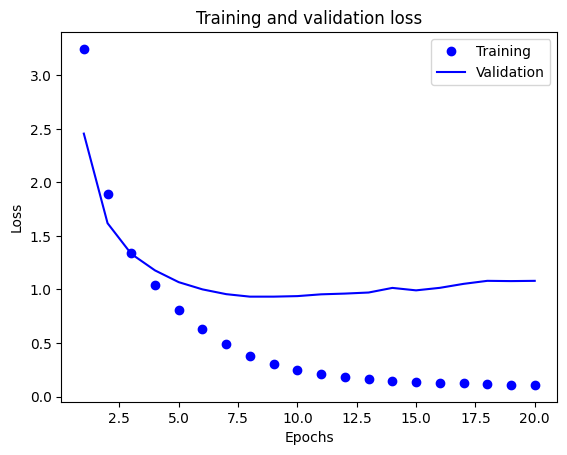

In [9]:
plot_epochs(range(1, len(loss) + 1), 
            loss, 
            "bo", "Training", 
            val_loss, "b", "Validation", 
            "Training and validation loss", 
            "Epochs", "Loss")

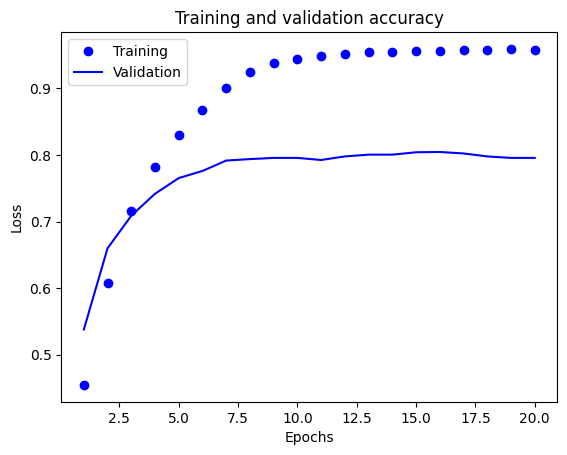

In [10]:
# Plotting the accuracy for training and validation

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plot_epochs(range(1, len(loss) + 1), 
            accuracy, 
            "bo", "Training", 
            val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

#### Observations:
##### The training accuracy improves significantly over the epochs, reaching close to 100%. This suggests that the model is learning well on the training data.
##### The validation accuracy increases at first but stops improving around epoch 8–10. After that, it slightly fluctuates but does not increase further.
##### The gap between training and validation accuracy grows after a few epochs. This suggests overfitting, where the model memorizes the training data but does not generalize well to unseen validation data.

<div class="alert alert-block alert-info">  
    <center><h2><strong>Predicting on new data</strong></h2></center>
</div>

<b>Summary of the section:</b> 
<p>Below we will try to use our model to predict on top of useen data to see how it performs. We will do this by following the steps below:</p>
<ol>
    <li>Load new unseen data: We take test samples from the Reuters dataset.</li>
    <li>Vectorize the sequences: Convert them into the same format as training data.</li>
    <li>Predict using the trained model,)</li>
    <li>Get the predicted class: Use np.argmax() to find the most likely class.</li>
    <li>Compare predictions to actual values: Check how well the model performs.</li>
</ol>
<div>

In [11]:
# Helper functions for prediction

# TODO: Fix function below
# Function to count number of correct predictions
def count_correct_predictions(y_test, predicted_classes):    
    true_classes = np.argmax(y_test, axis=1)
    
    return np.sum(predicted_classes == true_classes)
    

# Function to decode a news article
def decode_article(encoded_article):
    word_index = reuters.get_word_index()
    
    # Invert the word index to map integers back to words
    index_to_word = {index + 3: word for word, index in word_index.items()}

    # Special indices for padding, start of sequence, etc.
    index_to_word[0] = "[PAD]"    # Padding token
    index_to_word[1] = "[START]"  # Start of sequence token
    index_to_word[2] = "[UNK]"    # Unknown word token
    
    return " ".join(index_to_word.get(i, "[UNK]") for i in encoded_article)

# TODO: Replace the actual and expected by the class text instead of text value
# Function to print all the mispredictions up until n
def get_misprediction(n, x_test_texts, x_test_vectorized, y_test, predictions, predicted_classes):
    if n  > len(y_test):
        return None
    
    for i in range(n):
        if predicted_classes[i] != y_test[i]:  # If prediction is incorrect
            print(f"Text: {decode_article(x_test_texts[i])}\nPredicted: {predicted_classes[i]}, Expected: {y_test[i]}\n")

In [12]:
# Make predictions on unseen data
predictions = model.predict(vectorized_test_data)

# Convert softmax output to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Showing examples of the results an example of a misprediction
get_misprediction(5, test_data, vectorized_test_data, test_labels, predictions, predicted_classes)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
Text: [START] [UNK] [UNK] oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north [UNK] fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to [UNK] principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the [UNK] exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
Predicted: 16, Expected: 4

Text:

In [13]:
# TODO> Fix
# predicted_classes = np.argmax(predictions, axis=1)

# correct_predictions = count_correct_predictions(test_data, predicted_classes)
# print("Number of correct predictions: ", correct_predictions)

<div class="alert alert-block alert-warning">  
<p>The model above is overfitting. The training accuracy reaches 96%, while the validation accuracy stagnates around 79-80% and the loss starts increasing after a few epochs. To optimize the model, we need to apply regularization, better dropout, and fine-tune hyperparameters. With this we expect to improve the accuracy for both training and validation, increase the loss divergence to make the model more stable and thus reduce overfitting.</p>
</div>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Model tuning</strong></h2></center>
</div>

<div class="alert alert-block alert-warning">  
<hr>
<p>Now we will build a new model based on our conclusions above. It will be a sequential model with 5 layers as described below:</p>
<ul>
     <li>1. Input Layer & First Hidden Layer: Fully connected layer with 64 neurons which uses  Rectified Linear Unit (ReLU) as its activation function to introduce non-linearity. This time in this layer we will add L2 Regularization in order to try and prevent the overfitting by penalizing large weights. </li>
     <li>2. Dropout Layer: We will add a dropout layer that randomly disable 50% of neurons during training. We expect this to also reduce the overfitting. </li>
     <li>3. Second Hidden Layer: Another fully connected layer with 32 neurons with L2 Regularization. </li>
     <li>4. Another Dropout Layer. This time to disable 30% of the neuros during training. </li>
     <li>5. Output Layer: Fully connected layer with 46 output neurons, corresponding to 46 possible classes (the categories in the dataset) with softmax activation. </li>
</ul>

</div>

In [14]:
# Helper functions for the optimization
from tensorflow.keras import models, layers, regularizers, callbacks

# Helper function to build the model
def build_optimized_model():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(10000,), 
                     kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(46, activation="softmax")  # Output layer
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

#### Now we will build and train our new model. 

In [15]:
# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
optimized_model = build_optimized_model()
optimized_model_history = optimized_model.fit(
    vectorized_train_data, vectorized_train_labels,
    epochs=20, batch_size=512,
    validation_data=(vectorized_test_data, vectorized_test_labels),
    callbacks=[early_stopping]
)

# Evaluate on test set
optimized_test_loss, optimized_test_acc = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(f"Optimized Test Accuracy: {optimized_test_acc:.4f}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1418 - loss: 3.8127 - val_accuracy: 0.5178 - val_loss: 3.0085
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4487 - loss: 2.8606 - val_accuracy: 0.5926 - val_loss: 2.0456
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5646 - loss: 2.1342 - val_accuracy: 0.6451 - val_loss: 1.7070
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6155 - loss: 1.7862 - val_accuracy: 0.6745 - val_loss: 1.5607
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6567 - loss: 1.6139 - val_accuracy: 0.6874 - val_loss: 1.4708
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6755 - loss: 1.4970 - val_accuracy: 0.6977 - val_loss: 1.4200
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7115 - loss: 1.3634 - val_accuracy: 0.7124 - val_loss: 1.3836
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7075 - loss: 1.3518 - val_accuracy: 0.7240 - val_loss

#### Let us see how our new model performed:

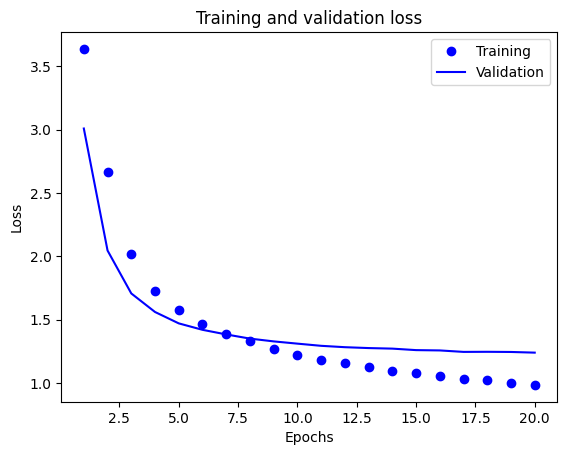

In [16]:
# Plotting the loss for training and validation

optimized_loss = optimized_model_history.history['loss']
optimized_val_loss = optimized_model_history.history['val_loss']

plot_epochs(range(1, len(loss) + 1), 
            optimized_loss, 
            "bo", "Training", 
            optimized_val_loss, "b", "Validation", 
            "Training and validation loss", 
            "Epochs", "Loss")

#### Observations:
##### Trend: Both training and validation accuracy increase over epochs. The same as the other model.
##### Training vs. Validation Accuracy: The training accuracy is consistently higher than the validation accuracy (line), but they follow a similar trajectory.
##### Potential Overfitting: The gap between training and validation accuracy suggests a slight overfitting trend, especially in later epochs. However, it does not seem excessive and is less than the previous model.

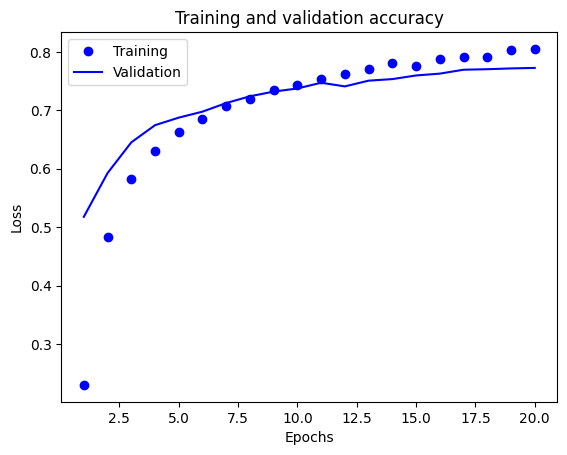

In [17]:
# Plotting the accuracy for training and validation

optimized_model_accuracy = optimized_model_history.history['accuracy']
optimized_model_val_accuracy = optimized_model_history.history['val_accuracy']

plot_epochs(range(1, len(loss) + 1), 
            optimized_model_accuracy, 
            "bo", "Training", 
            optimized_model_val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

#### Observations:
##### Loss Decrease: Both training and validation loss decrease over time, indicating successful learning.
##### Stabilization: The validation loss stabilizes after about 10 epochs, while training loss continues to slightly decrease.
##### No Clear Overfitting in Loss: Since validation loss does not increase after many epochs, overfitting is not severe. Better than the previous model